In [1]:
import pandas as pd

df = pd.read_csv("../data/real_estate_data.csv")
df.head()

,price,sqft,num_bedrooms,num_bathrooms,zipcode,year_built,has_pool
0,250000,1400,3,2,21044,1990,no
1,340000,1600,4,2,21045,2001,yes
2,500000,2100,4,3,21046,2015,yes
3,420000,1800,3,2,21045,1999,no
4,620000,2500,5,4,21044,2020,yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          5 non-null      int64 
 1   sqft           5 non-null      int64 
 2   num_bedrooms   5 non-null      int64 
 3   num_bathrooms  5 non-null      int64 
 4   zipcode        5 non-null      int64 
 5   year_built     5 non-null      int64 
 6   has_pool       5 non-null      object
dtypes: int64(6), object(1)
memory usage: 408.0+ bytes


In [3]:
df.describe()

,price,sqft,num_bedrooms,num_bathrooms,zipcode,year_built
count,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000
mean,426000.000000,1880.000000,3.80000,2.600000,21044.80000,2005.000000
std,142758.537398,432.434966,0.83666,0.894427,0.83666,12.267844
min,250000.000000,1400.000000,3.00000,2.000000,21044.00000,1990.000000
25%,340000.000000,1600.000000,3.00000,2.000000,21044.00000,1999.000000
50%,420000.000000,1800.000000,4.00000,2.000000,21045.00000,2001.000000
75%,500000.000000,2100.000000,4.00000,3.000000,21045.00000,2015.000000
max,620000.000000,2500.000000,5.00000,4.000000,21046.00000,2020.000000


In [4]:
df.isnull().sum()

price            0
sqft             0
num_bedrooms     0
num_bathrooms    0
zipcode          0
year_built       0
has_pool         0
dtype: int64

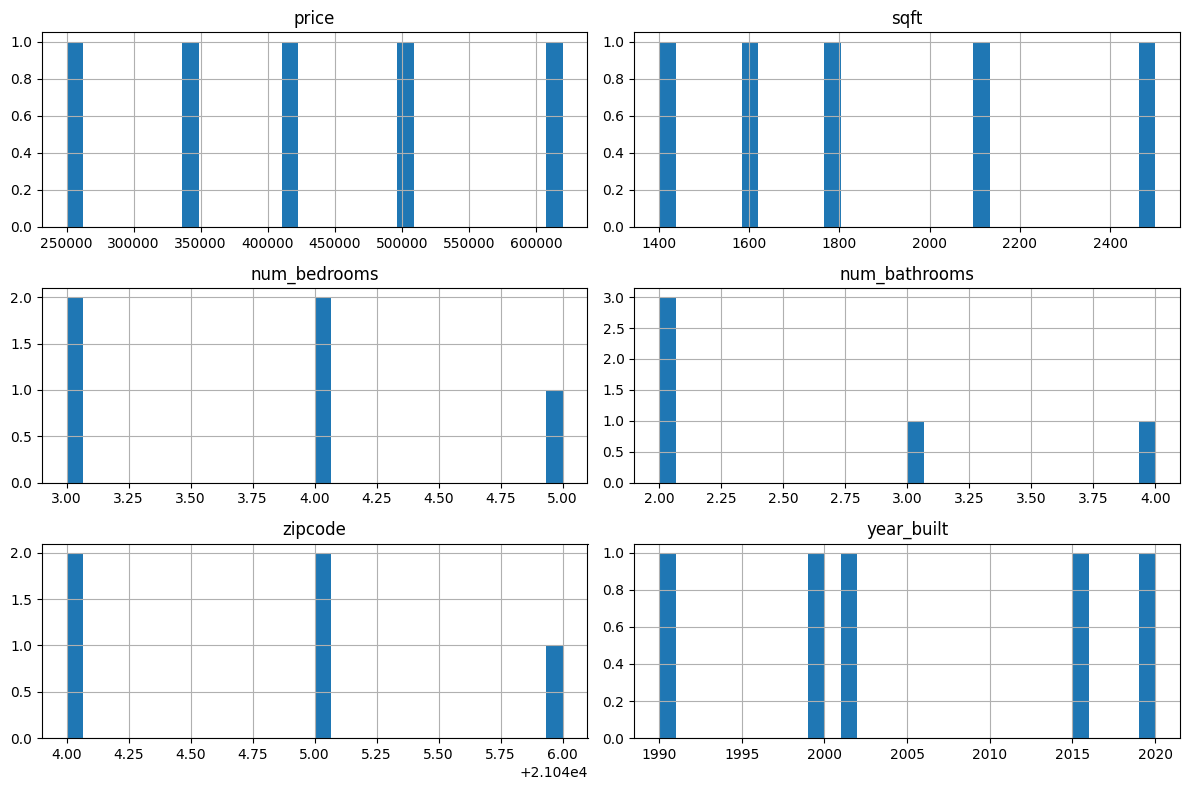

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

In [6]:
corr_matrix = df.corr(numeric_only=True)

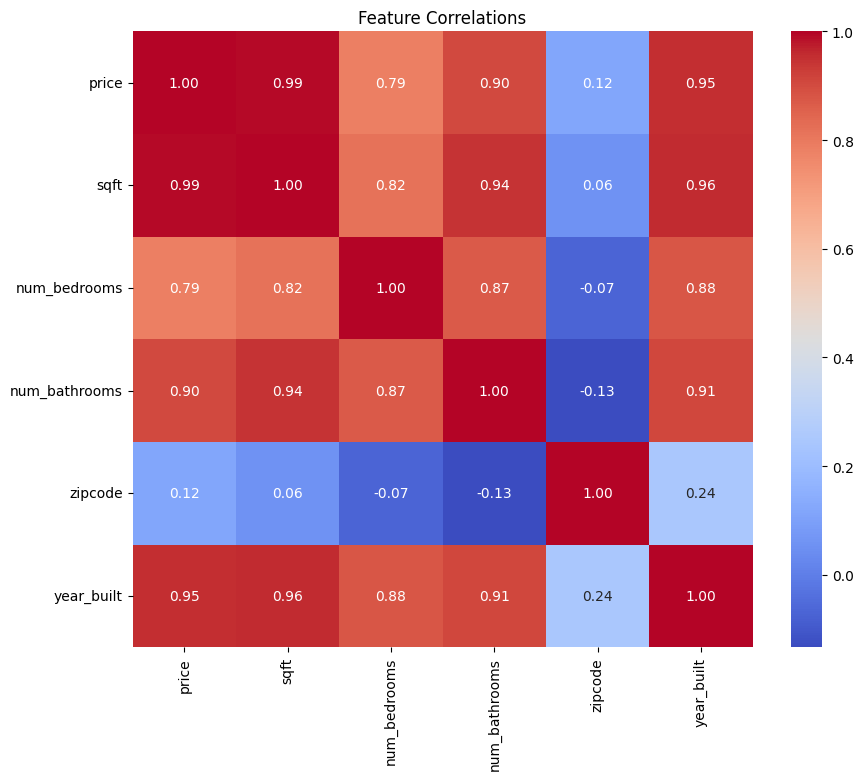

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations")
plt.show()

In [8]:
df["house_age"] = 2025 - df["year_built"]

In [9]:
df.drop("year_built", axis=1, inplace=True)

In [10]:
df["has_pool"] = df["has_pool"].map({"yes": 1, "no":0})

In [11]:
df = pd.get_dummies(df, columns=["zipcode"], drop_first=True)

In [12]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   price          5 non-null      int64
 1   sqft           5 non-null      int64
 2   num_bedrooms   5 non-null      int64
 3   num_bathrooms  5 non-null      int64
 4   has_pool       5 non-null      int64
 5   house_age      5 non-null      int64
 6   zipcode_21045  5 non-null      bool 
 7   zipcode_21046  5 non-null      bool 
dtypes: bool(2), int64(6)
memory usage: 378.0 bytes


,price,sqft,num_bedrooms,num_bathrooms,has_pool,house_age,zipcode_21045,zipcode_21046
0,250000,1400,3,2,0,35,False,False
1,340000,1600,4,2,1,24,True,False
2,500000,2100,4,3,1,10,False,True
3,420000,1800,3,2,0,26,True,False
4,620000,2500,5,4,1,5,False,False


In [13]:
X = df.drop("price", axis=1)
y = df["price"].copy()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline ([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X_prepared = pipeline.fit_transform(X)

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = lin_reg.predict(X_prepared)
lin_mse = mean_squared_error(y, y_pred)
lin_rmse = np.sqrt(lin_mse)

print("Linear Regression RMSE:", lin_rmse)

Linear Regression RMSE: 1.1044127145438848e-10


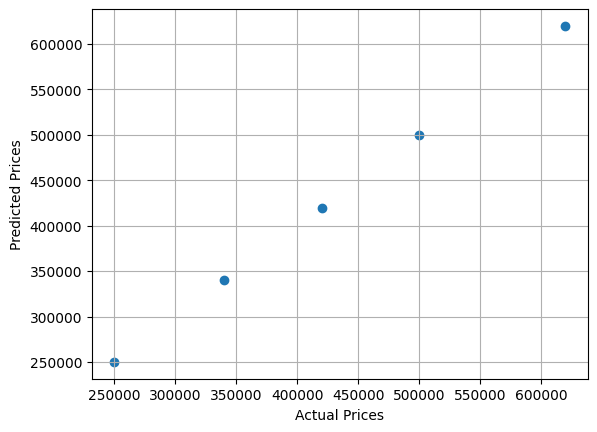

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title
("Actual vs. Predicted Housing Prices")
plt.grid(True)
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(lin_reg, X_prepared, y, 
                         scoring="neg_mean_squared_error", cv=3)

rmse_scores = np.sqrt(-scores)

In [19]:
import pandas as pd
import numpy as np

np.random.seed(42)

n_new = 25
new_data = {
    "price": np.random.randint(200000, 800000, size=n_new),
    "sqft": np.random.randint(1000, 3000, size=n_new),
    "num_bedrooms": np.random.randint(2, 6, size=n_new),
    "num_bathrooms": np.random.randint(1, 4, size=n_new),
    "zipcode": np.random.choice(["21044", "21045", "21046"], size=n_new),
    "year_built": np.random.randint(1980, 2025, size=n_new)
}

df_fake = pd.DataFrame(new_data)

df = pd.concat([df, df_fake], ignore_index=True)

print("New dataset shape:", df.shape)
df.head()

New dataset shape: (30, 10)


,price,sqft,num_bedrooms,num_bathrooms,has_pool,house_age,zipcode_21045,zipcode_21046,zipcode,year_built
0,250000,1400,3,2,0.0,35.0,False,False,NaN,NaN
1,340000,1600,4,2,1.0,24.0,True,False,NaN,NaN
2,500000,2100,4,3,1.0,10.0,False,True,NaN,NaN
3,420000,1800,3,2,0.0,26.0,True,False,NaN,NaN
4,620000,2500,5,4,1.0,5.0,False,False,NaN,NaN


In [20]:
df["house_age"] = 2025 - df["year_built"]
df.drop("year_built", axis=1, inplace=True)
df["has_pool"] = df["has_pool"].map({"yes": 1, "no":0})
df = pd.get_dummies(df, columns=["zipcode"], drop_first=True)

In [21]:
X.nunique()

sqft             5
num_bedrooms     3
num_bathrooms    3
has_pool         2
house_age        5
zipcode_21045    2
zipcode_21046    2
dtype: int64

X.isnull().sum()

In [22]:
X = X.loc[:, X.nunique() > 1]

In [23]:
X_prepared = pipeline.fit_transform(X)

In [24]:
X_prepared[:5]

array([[-1.24101046, -1.06904497, -0.75      , -1.22474487,  1.36702991,
        -0.81649658, -0.5       ],
       [-0.72392277,  0.26726124, -0.75      ,  0.81649658,  0.36454131,
         1.22474487, -0.5       ],
       [ 0.56879646,  0.26726124,  0.5       ,  0.81649658, -0.91135327,
        -0.81649658,  2.        ],
       [-0.20683508, -1.06904497, -0.75      , -1.22474487,  0.54681196,
         1.22474487, -0.5       ],
       [ 1.60297184,  1.60356745,  1.75      ,  0.81649658, -1.36702991,
        -0.81649658, -0.5       ]])

In [25]:
X_prepared.shape

(5, 7)

In [26]:
scores = cross_val_score(lin_reg, X_prepared, y,
                         scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-scores)

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard Deviation:", rmse_scores.std())

Cross-Validation RMSE Scores: [163812.33761348 123275.68485669  22574.89895769 134936.96177604
 125106.39692729]
Mean: 113941.25602623718
Standard Deviation: 47932.3431005051


In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

tree_reg = DecisionTreeRegressor(random_state=42)

tree_scores = cross_val_score(tree_reg, X_prepared, y,
                              scoring="neg_mean_squared_error", cv=5)

tree_rmse = np.sqrt(-tree_scores)

print("Decision Tree RMSE Scores:", tree_rmse)
print("Mean:", tree_rmse.mean())
print("Standard Deviation:", tree_rmse.std())

Decision Tree RMSE Scores: [250000.  80000. 160000.  80000. 120000.]
Mean: 138000.0
Standard Deviation: 63371.91807101944


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

forest_reg = RandomForestRegressor(random_state=42)

forest_scores = cross_val_score(forest_reg, X_prepared, y, 
                                scoring="neg_mean_squared_error", cv=5)

forest_rmse = np.sqrt(-forest_scores)

print("Random Forest RMSE Scores:", forest_rmse)
print("Mean:", forest_rmse.mean())
print("Standard Deviation:", forest_rmse.std())

Random Forest RMSE Scores: [176400.  53100.  83400.  93400. 177400.]
Mean: 116740.0
Standard Deviation: 50882.83010996931


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#Defining Grid
param_grid = {
    "n_estimators": [30, 50, 100],
    "max_features": [4, 6, 8],
}

forest_red = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    forest_reg, param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
return_train_score=True
)
grid_search.fit(X_prepared, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_features': [4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

Best parameters: {'max_features': 8, 'n_estimators': 100}
Best RMSE: 127347.12403505624
